In [1]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit

In [2]:
n = 4

In [3]:
def oracle(n):

  oracle = QuantumCircuit(n, name='oracle')
  oracle.ccx(1, 2, 3)
  oracle.cx(0, 3)
  oracle.barrier()

  return oracle

In [4]:
qc = QuantumCircuit(n)
qc.x(n-1)
qc.h(range(n))
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)), clbits=())

In [5]:
qc.append(oracle(4), range(4))
qc.barrier()

qc.h(range(n-1))
qc.measure_all()
qc.draw()


┌───┐      ░ ┌─────────┐ ░ ┌───┐ ░ ┌─┐         
   q_0: ┤ H ├──────░─┤0        ├─░─┤ H ├─░─┤M├─────────
        ├───┤      ░ │         │ ░ ├───┤ ░ └╥┘┌─┐      
   q_1: ┤ H ├──────░─┤1        ├─░─┤ H ├─░──╫─┤M├──────
        ├───┤      ░ │  oracle │ ░ ├───┤ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├──────░─┤2        ├─░─┤ H ├─░──╫──╫─┤M├───
        ├───┤┌───┐ ░ │         │ ░ └───┘ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ X ├┤ H ├─░─┤3        ├─░───────░──╫──╫──╫─┤M├
        └───┘└───┘ ░ └─────────┘ ░       ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════════════════╩══╩══╩══╩═
                                            0  1  2  3

In [6]:
# before we run it we have to decompose the circuit
# otherwise it'll try to apply the 'oracle' gate
qc = qc.decompose()

In [7]:
sim = AerSimulator()

result = sim.run([qc], shots=1024).result()
measurements = result.get_counts()
print(measurements)

{'1011': 124, '1001': 140, '0101': 121, '0011': 116, '0111': 137, '1111': 119, '0001': 141, '1101': 126}


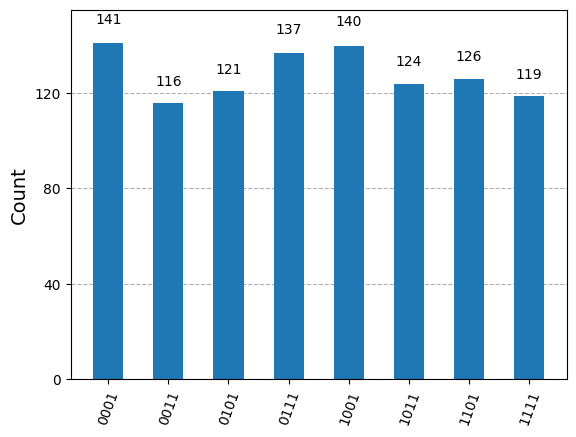

In [8]:
plot_histogram(measurements)

Since the probability of getting all 0s is 0, we can see the function is balanced